## **<span style="color:#023e8a;font-size:200%"><center> 🔥🔥 Cifer-10 Analysis 🔥🔥</center></span>**
## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Create Usefull Notebook for Cifer-10 Datasets with the different Condition</span></center>**
## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Name: Mejbah Ahammad</span></center>**
## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Student ID: 22-92357-1</span></center>**

The **CIFAR-10 dataset** consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. For completing this assignment i have taken some steps to make it smooth and clear getting the clear information at a glance what i have done on it.

Now, performing this assignment i have taken few necessary module for analysis the meta-data of the raw datasets. They are following:


<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Numpy</span>
<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Pandas</span>
<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Mapltolib</span>
<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Random</span>
<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">OpenCV</span>
<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Keras</span>
<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">TensorFlow</span>
<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Scikit-Learn</span>


In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten,MaxPooling2D, BatchNormalization, Activation,MaxPool2D
from sklearn.metrics import classification_report, confusion_matrix


## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Let Load the datasets from builtin API</span></center>

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print(f"shape of x_train: {x_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of x_test: {x_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)


We can see that total number of immages in x_train are 5000 and have shape of 32x32 with three colours(RGB).

In [5]:
#checking the type
print(f"type of y_train:{type(y_train)}")
print(f"type of x_train:{type(x_train)}")
print(f"type of y_test:{type(y_test)}")
print(f"type of x_test:{type(x_test)}")

type of y_train:<class 'numpy.ndarray'>
type of x_train:<class 'numpy.ndarray'>
type of y_test:<class 'numpy.ndarray'>
type of x_test:<class 'numpy.ndarray'>


In [6]:
y_test[0:2]

array([[3],
       [8]], dtype=uint8)

We can see that data type is not in correct format also we have to normalize our data.

In [7]:
y_train[0:2]

array([[6],
       [9]], dtype=uint8)

We can see that immages are in array format.

In [8]:
#checking total number of classis and immages in each class in training dataset
unique, counts = np.unique(y_train, return_counts=True)
train_classes=dict(zip(unique, counts))
print(train_classes)

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


Totel number of classes are ten and each class have 5000 immages in training set.

In [9]:
#checking total number of classis and immages in each class in training dataset
unique, counts = np.unique(y_test, return_counts=True)
test_classes=dict(zip(unique, counts))
print(test_classes)

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


Total number of classes are ten and each class have 1000 immages in test set.

Now counting the total immages in each set/folder

In [10]:
lst=[x_train,y_train,x_test,y_test]
No_of_immages=[]
for x in lst:
  y=len(x)
  No_of_immages.append(y)
print(No_of_immages)

[50000, 50000, 10000, 10000]


In [11]:
list1=['x_train',"y_train","x_test","y_test"]
dict1={}
for key in list1:
  for  value in No_of_immages:
    dict1[key]=value
    No_of_immages.remove(value)
    break  
print(dict1)


{'x_train': 50000, 'y_train': 50000, 'x_test': 10000, 'y_test': 10000}


In [12]:
dict1

{'x_train': 50000, 'y_train': 50000, 'x_test': 10000, 'y_test': 10000}

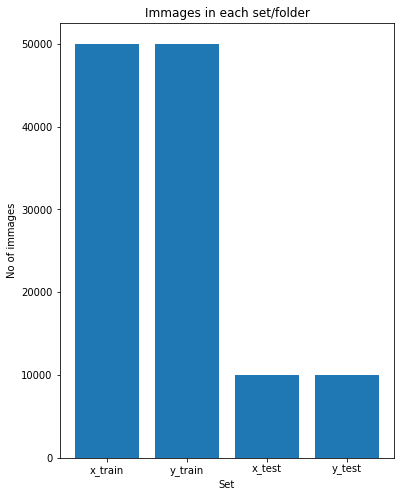

In [13]:
#No of immages 
plt.figure(figsize=(6,8))
plt.bar(dict1.keys(),dict1.values())
plt.xlabel("Set")
plt.ylabel('No of immages')
plt.title("Immages in each set/folder")
plt.show()


In [14]:
#Plotting some of immages in training dataset
def plot_immage(start,end,set1):
  
  #j=1
  for x in range(start,end):
    
    # reading image from directory
    image = set1[x]
    
    #plt.subplot(1,5,j)
    # calling imshow() using plt object
    plt.imshow(image)
    # displaying the image
    plt.show()
    #j+=1

_________immages in training data____________


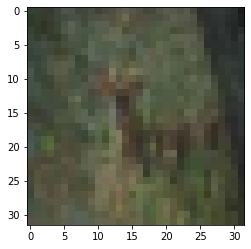

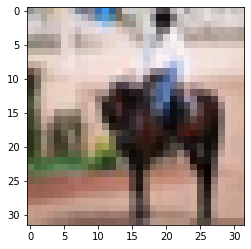

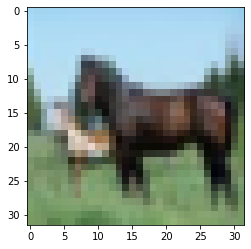

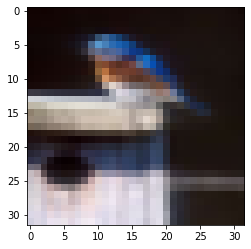

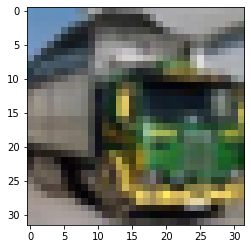


_________Some of immages in test data____________


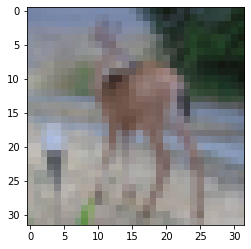

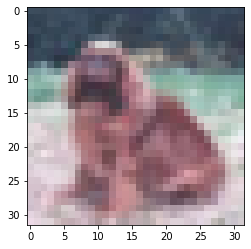

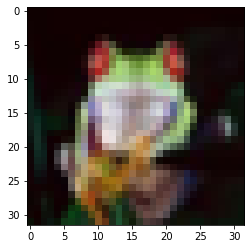

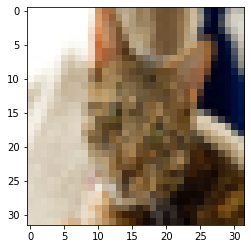

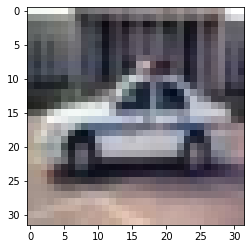

In [15]:
#If we want to show some immages in different data sets
print("_________immages in training data____________")
plot_immage(10,15,x_train)# plotting some immages in training set
print("")
print("_________Some of immages in test data____________")
plot_test=plot_immage(100,105,x_test)# plotting some immage in test set

In [16]:
print(x_train.max())
print(x_test.max())

255
255


In [17]:
print(x_train.min())
print(x_test.min())

0
0


Checking whether our input data is in correct format.

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
#data type
x_test.dtype

dtype('uint8')

In [21]:
x_train.dtype

dtype('uint8')

In [22]:
#data type is not in correct format so changing the data type to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(f"data type of x_train: {x_train.dtype}")
print(f"data type of x_test: {x_test.dtype}")

data type of x_train: float32
data type of x_test: float32


We can see that the data is not normalized.

In [23]:
# normalizing
x_train =x_train/ 255
x_test= x_test/ 255

In [24]:
print(f"shape of y_train before one-hot encoding: {y_train.shape}")
print(f"shape of y_test before one-hot encoding: {y_test.shape}")

shape of y_train before one-hot encoding: (50000, 1)
shape of y_test before one-hot encoding: (10000, 1)


In [25]:
y_train.dtype

dtype('uint8')

In [26]:
y_test.dtype

dtype('uint8')

In [27]:
#changing dtype of y_train and y_test to int
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print(f"data type of y_train: {y_train.dtype}")
print(f"data type of y_test: {y_test.dtype}")

data type of y_train: int32
data type of y_test: int32


In [28]:
print("****a single examples label y_train****")
print(y_train[1])
print('')
print("****a single examples label y_test****")
print(y_test[1])

****a single examples label y_train****
[9]

****a single examples label y_test****
[8]


So, before proceeding we want to encode our labels.

In [29]:
#one-hot encoding
total_classes=10
y_train_en = to_categorical(y_train, total_classes)
y_test_en = to_categorical(y_test, total_classes)


In [30]:
print(f"shape of y_train after one-hot encoding: {y_train.shape}")
print(f"shape of y_test after one-hot encoding: {y_test.shape}")

shape of y_train after one-hot encoding: (50000, 1)
shape of y_test after one-hot encoding: (10000, 1)


In [31]:
#building the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),input_shape=(32, 32, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                        

In [33]:
from keras.callbacks import EarlyStopping
#To avoid overfitting early stopping is used
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 2,
                          verbose = 1,
                          restore_best_weights = True)
callbacks = [earlystop]

In [34]:
history=model.fit(x_train, y_train_en, batch_size=128, epochs=20, validation_data=(x_test, y_test_en),callbacks=callbacks)

Epoch 1/20
391/391 [==============================] - 15s 27ms/step - loss: 1.5338 - accuracy: 0.4607 - val_loss: 2.4701 - val_accuracy: 0.2446
Epoch 2/20
391/391 [==============================] - 10s 25ms/step - loss: 0.9958 - accuracy: 0.6547 - val_loss: 0.8553 - val_accuracy: 0.6962
Epoch 3/20
391/391 [==============================] - 10s 26ms/step - loss: 0.8265 - accuracy: 0.7123 - val_loss: 0.7623 - val_accuracy: 0.7327
Epoch 4/20
391/391 [==============================] - 10s 26ms/step - loss: 0.7222 - accuracy: 0.7484 - val_loss: 0.8075 - val_accuracy: 0.7318
Epoch 5/20
391/391 [==============================] - 10s 25ms/step - loss: 0.6427 - accuracy: 0.7779 - val_loss: 0.6519 - val_accuracy: 0.7741
Epoch 6/20
391/391 [==============================] - 10s 26ms/step - loss: 0.5825 - accuracy: 0.7993 - val_loss: 0.7387 - val_accuracy: 0.7530
Epoch 7/20
391/391 [==============================] - 10s 26ms/step - loss: 0.5243 - accuracy: 0.8188 - val_loss: 0.6662 - val_accuracy:

We can add more data(data augmentation) and tune our model to decrease overfitting.

In [35]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [36]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

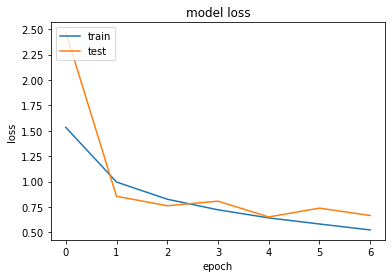

In [37]:
#model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

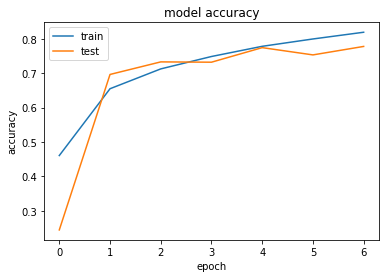

In [38]:
#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#model evaluation for test set
loss, accuracy=model.evaluate(x_test,y_test_en,verbose=0)
print(loss)
print(accuracy)

0.6518716216087341
0.7741000056266785


In [40]:
#model evaluation for training set
loss, accuracy=model.evaluate(x_train,y_train_en,verbose=0)
print("Model Losses : ",loss)
print("Model accuracy: ",accuracy)

Model Losses :  0.48193174600601196
Model accuracy:  0.8322799801826477


In [41]:
#prediction
y_pred = np.argmax(model.predict(x_test), axis=-1)

In [42]:
#confussion metrix
confusion_matrix(y_test,y_pred)

array([[838,  19,  36,  12,   6,   0,   0,   4,  61,  24],
       [ 14, 872,   1,   3,   2,   1,   3,   2,  46,  56],
       [ 62,   4, 728,  53,  60,  15,  40,  15,  17,   6],
       [ 32,   6,  90, 664,  38,  64,  42,  17,  30,  17],
       [ 22,   5,  56,  66, 759,  12,  18,  45,  14,   3],
       [ 23,   4,  85, 253,  33, 543,  13,  28,  14,   4],
       [ 13,   6,  65,  60,  36,   6, 779,   2,  23,  10],
       [ 25,   4,  60,  52,  34,  17,   1, 787,   5,  15],
       [ 52,   7,  13,   6,   1,   0,   1,   1, 914,   5],
       [ 29,  55,   3,   7,   0,   0,   2,   1,  46, 857]], dtype=int64)

In [43]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1000
           1       0.89      0.87      0.88      1000
           2       0.64      0.73      0.68      1000
           3       0.56      0.66      0.61      1000
           4       0.78      0.76      0.77      1000
           5       0.83      0.54      0.66      1000
           6       0.87      0.78      0.82      1000
           7       0.87      0.79      0.83      1000
           8       0.78      0.91      0.84      1000
           9       0.86      0.86      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

